#Binary Search Tree

In [ ]:
# Binary Search Tree operations 
 
# Create a node BST normal
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        
    def __repr__(self):
      return str(self.key)


# Inorder traversal
def inorder(root):
    if root is not None:
        # Traverse left
        inorder(root.left)

        # Traverse root
        print(str(root.key) + " ", end=' ')

        # Traverse right
        inorder(root.right)

# preorder traversal
def Preorder(root): 
  
    if root is not None: 
  
        # First print the data of node 
        print(str(root.key) + " ", end=' ') 
  
        # Then recur on left child 
        Preorder(root.left) 
  
        # Finally recur on right child 
        Preorder(root.right)
#portorder traversal
def Postorder(root): 
  
    if root is not None: 
  
        # First recur on left child 
        Postorder(root.left) 
  
        # the recur on right child 
        Postorder(root.right) 
  
        # now print the data of node 
        print(str(root.key) + " ", end=' ')
  

# Insert a node
def insert(node, key):

    # Return a new node if the tree is empty
    if node is None:
        return Node(key)

    # Traverse to the right place and insert the node
    if key < node.key:
        node.left = insert(node.left, key)
    else:
        node.right = insert(node.right, key)

    return node


# Find the inorder successor
def minValueNode(node):
    current = node

    # Find the leftmost leaf
    while(current.left is not None):
        current = current.left

    return current


# Deleting a node
def deleteNode(root, key):

    # Return if the tree is empty
    if root is None:
        return root

    # Find the node to be deleted
    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif(key > root.key):
        root.right = deleteNode(root.right, key)
    else:
        # If the node is with only one child or no child
        if root.left is None:
            temp = root.right
            root = None
            return temp

        elif root.right is None:
            temp = root.left
            root = None
            return temp

        # If the node has two children,
        # place the inorder successor in position of the node to be deleted
        temp = minValueNode(root.right)

        root.key = temp.key

        # Delete the inorder successor
        root.right = deleteNode(root.right, temp.key)

    return root
def search(root,key):
     
    # Base Cases: root is null or key is present at root
    if root is None or root.key == key:
        return root
 
    # Key is greater than root's key
    if root.key < key:
        return search(root.right,key)
   
    # Key is smaller than root's key
    return search(root.left,key)

import random
root = None
def GenData():
    nums=list(range(1,5000001))   
    for nums in range(1,5000001):
          data.append(nums)
data =[]      
Index_BST = 0 
n1 = 0
n2 = 50000
def insertBST():
  global Index_BST
  global root,n1,n2
  for i in range(n1,n2):  
    root = insert(root,data[i])  
  n1+=n2
  n2+=50000
  return n1,n2
GenData()
random.shuffle(data)
insertBST()
print("Inorder traversal: ", end=' ')
inorder(root)
print("\nPreorder traversal:", end = ' ')
Preorder(root)
print("\nPostorder traversal:",end=' ')
Postorder(root)
print("\nDelete :5")
root = deleteNode(root,5)
print("Inorder traversal: ", end=' ')
inorder(root)
print("\nSearch:", search(root, 10))


Inorder traversal:  37  162  212  220  227  240  320  407  428  430  513  575  632  649  672  693  791  926  969  1090  1119  1213  1302  1544  1761  2189  2232  2264  2353  2631  2817  2840  3331  3457  3475  3553  3581  3680  3731  3883  3905  3985  4194  4618  4628  4694  4734  4742  4796  4983  5113  5133  5220  5274  5515  5529  5609  5622  5671  5789  5878  5917  6045  6457  6857  6876  6897  6944  7357  7424  7428  7433  7549  7693  7707  7918  7957  7978  8072  8300  8442  8625  8678  8804  8805  8862  8963  9025  9100  9138  9146  9177  9396  9440  9638  9842  9853  9938  9998  10230  10454  10753  10758  10879  10907  10918  10985  10997  11016  11126  11144  11208  11261  11263  11280  11425  11581  11679  11862  11970  12080  12247  12582  12644  12743  12870  12954  12972  13059  13151  13166  13218  13275  13434  13478  13615  13956  13969  14292  14389  14457  14511  14768  14876  14877  15121  15213  15221  15441  15538  15611  15705  15950  16020  16324  16379  16408  

In [ ]:
import timeit
import time
t = timeit.timeit(lambda:insertBST() , number = 100)
print("Insert_time :", end =' ')
print('{:.6f}'.format(t),"sec")
t1 = timeit.timeit(lambda:deleteNode(root,18) ,number = 100)
print("\nDelete_time :", end =' ')
print('{:.6f}'.format(t1),"sec")
t2 = timeit.timeit(lambda:search(root,16) ,number = 100)
print("\nSearch_time :", end =' ')
print('{:.6f}'.format(t2),"sec")

Insert_time : 0.613281 sec

Delete_time : 0.000377 sec

Search_time : 0.000399 sec


#AVL Tree

In [ ]:
# AVL tree implementation in Python
import sys

# Create  node AVL tree
class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
    def __repr__(self):
      return str(self.key)


class AVLTree(object):
      # Function to insert a node
    def insert_node(self, root, key):

        # Find the correct location and insert the node
        if not root:
            return TreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Function to delete a node
    def delete_node(self, root, key):

        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)
def Search(root,key):
    if (root is None):
        return False
    elif (root.key == key):
        return True
    elif(root.key < key):
        return Search(root.right,key)
    return Search(root.left,key)
    return False

import random           
myTree = AVLTree()
root = None
def Gen_Data():
    nums=list(range(1,5000001))   
    for nums in range(1,5000001):
          testdata.append(nums)
testdata =[]      
Index_Avl = 0 
n1 = 0
n2 = 50000
def insertAvl():
  global Index_Avl
  global root,n1,n2
  for i in range(n1,n2):
    root = myTree.insert_node(root,testdata[i])
  n1+=n2
  n2+=50000  
  return n1,n2
Gen_Data()
random.shuffle(testdata)
insertAvl()
print("Preorder traversal of the",
      "constructed AVL tree is")
myTree.preOrder(root)
print("")
myTree.printHelper(root, "", True)
key = 5
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)

Streaming output truncated to the last 5000 lines.
               |                        |                                  L----4490101
               |                        |                                  |    L----4489822
               |                        |                                  |    R----4490199
               |                        |                                  |         L----4490132
               |                        |                                  |         R----4490343
               |                        |                                  R----4490733
               |                        |                                       L----4490707
               |                        |                                       R----4490847
               |                        R----4503228
               |                             L----4497267
               |                             |    L----4494116
               |               

In [ ]:
import timeit
import time
ttAVL = timeit.timeit(lambda: insertAvl() , number = 100)
print("Insert AVL tree time :", end =' ')
print('{:.6f}'.format(ttAVL),"sec")
delAVL = timeit.timeit(lambda:myTree.delete_node(root,900) , number = 100)
print("Delete AVL tree time :", end =' ')
print('{:.6f}'.format(delAVL),"sec")
searchAVL = timeit.timeit(lambda: myTree.delete_node(root,900) , number = 100)
print("Delete AVL tree time :", end =' ')
print('{:.6f}'.format(searchAVL),"sec")

Insert AVL tree time : 2.816910 sec
Delete AVL tree time : 0.002259 sec
Delete AVL tree time : 0.002217 sec


#ReaBlackTree


In [ ]:
import sys


# Node creation RedBlackTree
class Node():
    def __init__(self, item):
        self.item = item
        self.parent = None
        self.left = None
        self.right = None
        self.color = 1
    def __repr__(self):
      return str(self.item)


class RedBlackTree():
    def __init__(self):
        self.TNULL = Node(0)
        self.TNULL.color = 0
        self.TNULL.left = None
        self.TNULL.right = None
        self.root = self.TNULL 
    def __repr__(self):
      return str(self.root)
    

    # Preorder
    def pre_order_helper(self, node):
        if node != TNULL:
            sys.stdout.write(node.item + " ")
            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    # Inorder
    def in_order_helper(self, node):
        if node != TNULL:
            self.in_order_helper(node.left)
            sys.stdout.write(node.item + " ")
            self.in_order_helper(node.right)

    # Postorder
    def post_order_helper(self, node):
        if node != TNULL:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)
            sys.stdout.write(node.item + " ")

    # Search the tree
    def search_tree_helper(self, node, key):
        if node == self.TNULL or key == node.item:
            return node

        if key < node.item:
            return self.search_tree_helper(node.left, key)
        return self.search_tree_helper(node.right, key)

    # Balancing the tree after deletion
    def delete_fix(self, x):
        while x != self.root and x.color == 0:
            if x == x.parent.left:
                s = x.parent.right
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.left_rotate(x.parent)
                    s = x.parent.right

                if s.left.color == 0 and s.right.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.right.color == 0:
                        s.left.color = 0
                        s.color = 1
                        self.right_rotate(s)
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.right.color = 0
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.right_rotate(x.parent)
                    s = x.parent.left

                if s.right.color == 0 and s.left.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.left.color == 0:
                        s.right.color = 0
                        s.color = 1
                        self.left_rotate(s)
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.left.color = 0
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = 0

    def __rb_transplant(self, u, v):
        if u.parent == None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    # Node deletion
    def delete_node_helper(self, node, key):
        z = self.TNULL
        while node != self.TNULL:
            if node.item == key:
                z = node

            if node.item <= key:
                node = node.right
            else:
                node = node.left

        if z == self.TNULL:
            
            return

        y = z
        y_original_color = y.color
        if z.left == self.TNULL:
            x = z.right
            self.__rb_transplant(z, z.right)
        elif (z.right == self.TNULL):
            x = z.left
            self.__rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.__rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 0:
            self.delete_fix(x)

    # Balance the tree after insertion
    def fix_insert(self, k):
        while k.parent.color == 1:
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right

                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 0

    # Printing the tree
    def __print_helper(self, node, indent, last):
        if node != self.TNULL:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "

            s_color = "RED" if node.color == 1 else "BLACK"
            print(str(node.item) + "(" + s_color + ")")
            self.__print_helper(node.left, indent, False)
            self.__print_helper(node.right, indent, True)

    def preorder(self):
        self.pre_order_helper(self.root)

    def inorder(self):
        self.in_order_helper(self.root)

    def postorder(self):
        self.post_order_helper(self.root)

    def searchTree(self, k):
        return self.search_tree_helper(self.root, k)

    def minimum(self, node):
        while node.left != self.TNULL:
            node = node.left
        return node

    def maximum(self, node):
        while node.right != self.TNULL:
            node = node.right
        return node

    def successor(self, x):
        if x.right != self.TNULL:
            return self.minimum(x.right)

        y = x.parent
        while y != self.TNULL and x == y.right:
            x = y
            y = y.parent
        return y

    def predecessor(self,  x):
        if (x.left != self.TNULL):
            return self.maximum(x.left)

        y = x.parent
        while y != self.TNULL and x == y.left:
            x = y
            y = y.parent

        return y

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.item = key
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 1

        y = None
        x = self.root

        while x != self.TNULL:
            y = x
            if node.item < x.item:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.item < y.item:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = 0
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def get_root(self):
        return self.root

    def delete_node(self, item):
        self.delete_node_helper(self.root, item)
   
    def print_tree(self):
        self.__print_helper(self.root, "", True)



  
import random   

# Driver program to test above function
myTree = RedBlackTree()


def GenData3():
    nums=list(range(1,5000001))   
    for nums in range(1,5000001):
          data3.append(nums)
    

data3 =[]      
Index_RBT = 0 
start3= 0
end3 = 50000
def insertRBT():
  global Index_RBT
  global root,start3,end3
  for i in range(start3,end3):
    myTree.insert(data3[i])
    
  start3+=end3
  end3+=50000
  return start3,end3
GenData3()
random.shuffle(data3)
insertRBT()
myTree.print_tree()
#myTree.searchTree(14)


Streaming output truncated to the last 5000 lines.
                    |    |    |    |         |    |    |    |    R----4506897(BLACK)
                    |    |    |    |         |    |    |    R----4507224(RED)
                    |    |    |    |         |    |    |         L----4507151(BLACK)
                    |    |    |    |         |    |    |         |    L----4506917(RED)
                    |    |    |    |         |    |    |         |    R----4507202(RED)
                    |    |    |    |         |    |    |         R----4507508(BLACK)
                    |    |    |    |         |    |    |              L----4507314(RED)
                    |    |    |    |         |    |    |              R----4507511(RED)
                    |    |    |    |         |    |    R----4507766(BLACK)
                    |    |    |    |         |    |         L----4507695(BLACK)
                    |    |    |    |         |    |         |    L----4507691(RED)
                    |    |

In [ ]:
import timeit

RBTt = timeit.timeit(lambda: insertRBT(), number = 100)
print("Insert RBTree time :", end =' ')
print('{:.6f}'.format(RBTt),"sec")
RBTdelete = timeit.timeit(lambda:myTree.delete_node(900) , number = 100)
print("Delete RBTree time :", end =' ')
print('{:.6f}'.format(RBTdelete),"sec")
RBTsearch = timeit.timeit(lambda:myTree.searchTree(600) , number = 100)
print("Search RBTree time :", end =' ')
print('{:.6f}'.format(RBTsearch ),"sec")

Insert RBTree time : 0.925705 sec
Delete RBTree time : 0.000479 sec
Search RBTree time : 0.000588 sec


No handles with labels found to put in legend.


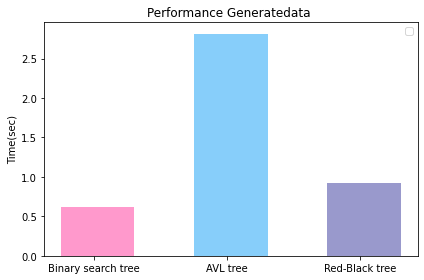

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Binary search tree','AVL tree','Red-Black tree']
genitem = [t,ttAVL,RBTt]

x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()

rects2 = ax.bar(x + width/20, genitem , width, color=['#FF99CC','LightSkyBlue','#9999CC'])



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time(sec)')
ax.set_title('Performance Generatedata ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()



No handles with labels found to put in legend.


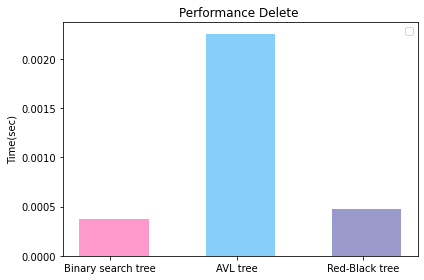

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Binary search tree','AVL tree','Red-Black tree']
BSTitem = [t1,delAVL,RBTdelete]



x = np.arange(len(labels))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+ width/20, BSTitem , width,color=['#FF99CC','LightSkyBlue','#9999CC'])



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time(sec)')
ax.set_title('Performance Delete ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()




No handles with labels found to put in legend.


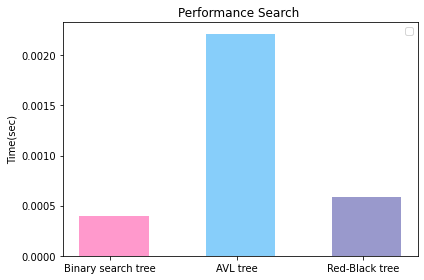

In [ ]:

labels3 = ['Binary search tree','AVL tree','Red-Black tree']
searchitem = [t2,searchAVL,RBTsearch]



x = np.arange(len(labels3))  # the label locations
width = 0.55  # the width of the bars

fig, ax = plt.subplots()
rects3 = ax.bar(x + width/20, searchitem, width, color=['#FF99CC','LightSkyBlue','#9999CC'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time(sec)')
ax.set_title('Performance Search ')
ax.set_xticks(x)
ax.set_xticklabels(labels3)
ax.legend()

fig.tight_layout()
plt.show()

